# Ejercicio 3 
Sean $𝑋1,.. .,𝑋𝑛$ variables aleatorias Normales(𝜇,1). Sea $𝜃 = 𝑒^{𝜇}$ y sea $𝜃^{∗} = 𝑒^{𝑋}$. Crear un conjunto de datos utilizando 𝜇 = 5 que tenga 𝑛 = 100 observaciones. 
* (a) Utilizar bootstrap para obtener el error estándar y el intervalo de confianza del 95% para 𝜃. 
* (b) Graficar histograma de las replicaciones bootstrap. Esto es una estimación de la distribución de 𝜃. Comparar con la verdadera distribución de muestreo de 𝜃.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

se=  15.235321607702591
IC_normal =  [np.float64(115.02019191960538), np.float64(174.7415552075693)]
IC_percentile =  [np.float64(118.12880133108769), np.float64(177.7093957022822)]
IC_basic =  [np.float64(111.93559818042615), np.float64(171.50019357082215)]
IC_bca =  [np.float64(118.56663893979764), np.float64(178.44067510387544)]


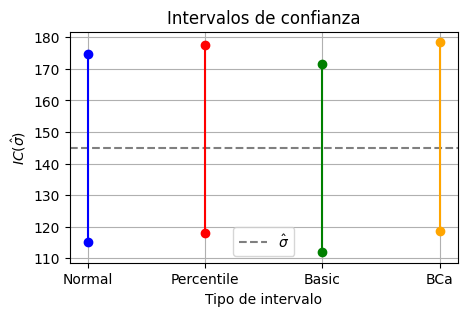

In [4]:
#Estaba resulto por los profes en el repo de bootstrap
alpha=0.05
n=100
mu=5
norm_sample = stats.norm.rvs(size=n,loc=mu,scale=1.0)
norm_sample = (norm_sample,)

def theta_hat(sample):
  return np.exp(np.mean(sample))

boot_percentile = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'percentile')
boot_basic = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'basic')
boot_bca = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'bca')

print('se= ',boot_percentile.standard_error)

low_percentile = boot_percentile.confidence_interval.low
up_percentile = boot_percentile.confidence_interval.high

low_basic = boot_basic.confidence_interval.low
up_basic = boot_basic.confidence_interval.high

low_bca = boot_bca.confidence_interval.low
up_bca = boot_bca.confidence_interval.high

low_normal = theta_hat(norm_sample) - stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error #puede ser el error estándar de cualquiera
up_normal = theta_hat(norm_sample) + stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error

print('IC_normal = ',[low_normal,up_normal])
print('IC_percentile = ',[low_percentile,up_percentile])
print('IC_basic = ',[low_basic,up_basic])
print('IC_bca = ',[low_bca,up_bca])

plt.figure(figsize=(5, 3))
interval_names = ['Normal', 'Percentile', 'Basic', 'BCa']
plt.axhline(theta_hat(norm_sample),color='k',ls='--',label=r'$\hat{\sigma}$',alpha=0.5)
plt.plot([1, 1], [low_normal, up_normal],'o-', color='blue')
plt.plot([2, 2], [low_percentile, up_percentile],'o-', color='red')
plt.plot([3, 3], [low_basic, up_basic],'o-', color='green')
plt.plot([4, 4], [low_bca, up_bca],'o-', color='orange')
plt.xticks([1,2,3,4],labels=interval_names)
plt.xlabel('Tipo de intervalo')
plt.ylabel(r'$IC(\hat{\sigma})$')
plt.title('Intervalos de confianza')
plt.legend()
plt.grid()
plt.show()

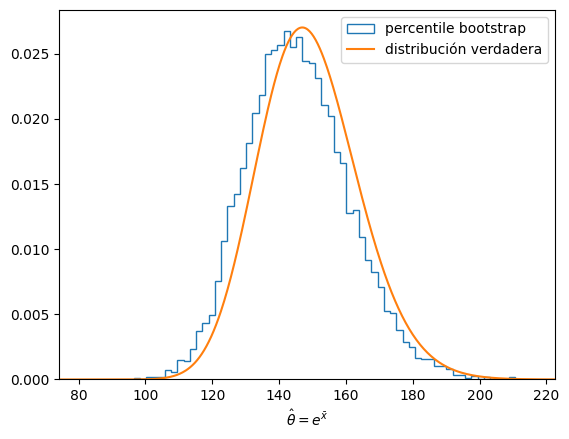

In [5]:
x = np.linspace(mu-10,mu+10,10000)
plt.hist(boot_percentile.bootstrap_distribution,density=True,bins='auto',histtype='step',label='percentile bootstrap')
norm_pdf = stats.norm.pdf(x, loc=mu, scale=np.sqrt(1/n))

plt.plot(np.exp(x),norm_pdf/np.exp(x),label='distribución verdadera')
plt.xlim(np.exp(mu)*0.5,np.exp(mu)*1.5)
plt.xlabel(r'$\hat{\theta}=e^{\bar{x}}$')
plt.legend()